In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
xtrain=pd.read_table('/home/hardik/Desktop/UCI HAR Dataset/train/X_train.txt',delim_whitespace=True,header=None)

In [3]:
xtest=pd.read_table('/home/hardik/Desktop/UCI HAR Dataset/test/X_test.txt',delim_whitespace=True,header=None)

In [4]:
ytrain=pd.read_table('/home/hardik/Desktop/UCI HAR Dataset/train/y_train.txt',header=None)

In [5]:
ytest=pd.read_table('/home/hardik/Desktop/UCI HAR Dataset/test/y_test.txt',header=None)

In [6]:
#converting into array
xtrain=xtrain.values 
xtest=xtest.values
ytrain=ytrain.values
ytest=ytest.values

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
knn = KNeighborsClassifier(n_neighbors = 24) #setting k= square root of 561

In [9]:
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [10]:
print str(accuracy_score(ytest,ypred)*100) + ' %'

90.2273498473 %


In [11]:
#Finding the optimal model by varying the no. of neighbors
scores = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors = i, n_jobs = -1)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    scores.append(accuracy_score(ytest,ypred))

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [12]:
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
xticks = range(1,50)
plt.plot(xticks, scores, color='red', linestyle='solid', marker='o',
         markerfacecolor='blue', markersize=5)

In [13]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20})

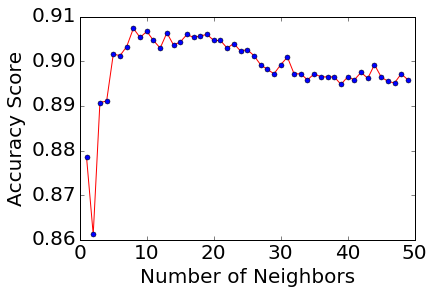

In [14]:
plt.show()

In [15]:
scores = np.array(scores)

In [16]:
#Final result after training the model
print'Optimal No. Of Neighbors: ', scores.argmax()+1
print'Accuracy Score: '+ str(scores.max()*100)+ ' %'

Optimal No. Of Neighbors:  8
Accuracy Score: 90.7363420428 %
